In [2]:
import numpy as np
import pandas as pd
import ast
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/recommandation.csv')

In [4]:
df.shape

(42620, 11)

In [5]:
df.head()

,Unnamed: 0,id,adult,belongs_to_collection,genres,overview,popularity,tagline,vote_average,vote_count,year_bins
0,0,0,False,Toy Story Collection,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",21.946943,Direct,7.7,5415.0,1980-2000
1,1,1,False,NaN,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,17.015539,Roll the dice and unleash the excitement!,6.9,2413.0,1980-2000
2,2,2,False,Grumpy Old Men Collection,"['Romance', 'Comedy']",A family wedding reignites the ancient feud be...,11.712900,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,1980-2000
3,3,3,False,NaN,"['Comedy', 'Drama', 'Romance']","Cheated on, mistreated and stepped on, the wom...",3.859495,Friends are the people who let you be yourself...,6.1,34.0,1980-2000
4,4,4,False,Father of the Bride Collection,['Comedy'],Just when George Banks has recovered from his ...,8.387519,Just When His World Is Back To Normal... He's ...,5.7,173.0,1980-2000


In [6]:
df.drop(columns=['Unnamed: 0','id','belongs_to_collection'],inplace=True)

In [7]:
df.dropna(subset=['year_bins'],inplace=True)

In [8]:
df.head(3)

,adult,genres,overview,popularity,tagline,vote_average,vote_count,year_bins
0,False,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",21.946943,Direct,7.7,5415.0,1980-2000
1,False,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,17.015539,Roll the dice and unleash the excitement!,6.9,2413.0,1980-2000
2,False,"['Romance', 'Comedy']",A family wedding reignites the ancient feud be...,11.712900,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,1980-2000


In [9]:
df.shape

(42618, 8)

In [10]:
df.isnull().sum()

,0
adult,0
genres,0
overview,0
popularity,0
tagline,0
vote_average,0
vote_count,0
year_bins,0


In [11]:
df['year_bins'].unique()

array(['1980-2000', '1960-1980', '1920-1940', '1940-1960', '2000-2005',
       '2005-2010', '2010-2015', '1900-1920', '1880-1900', '2015-2020'],
      dtype=object)

In [12]:
df['year_bins'].value_counts()

,count
year_bins,
1980-2000,9478
2010-2015,8549
2005-2010,6681
1960-1980,5844
2000-2005,4464
1940-1960,3471
2015-2020,2007
1920-1940,1778
1900-1920,261


In [13]:
from sklearn.preprocessing import LabelBinarizer
# Encoding categorical variable
lb = LabelBinarizer()
df['adult'] = lb.fit_transform(df['adult'])

In [14]:
df.head(5)

,adult,genres,overview,popularity,tagline,vote_average,vote_count,year_bins
0,0,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",21.946943,Direct,7.7,5415.0,1980-2000
1,0,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,17.015539,Roll the dice and unleash the excitement!,6.9,2413.0,1980-2000
2,0,"['Romance', 'Comedy']",A family wedding reignites the ancient feud be...,11.712900,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,1980-2000
3,0,"['Comedy', 'Drama', 'Romance']","Cheated on, mistreated and stepped on, the wom...",3.859495,Friends are the people who let you be yourself...,6.1,34.0,1980-2000
4,0,['Comedy'],Just when George Banks has recovered from his ...,8.387519,Just When His World Is Back To Normal... He's ...,5.7,173.0,1980-2000


In [15]:
df.columns

Index(['adult', 'genres', 'overview', 'popularity', 'tagline', 'vote_average',
       'vote_count', 'year_bins'],
      dtype='object')

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
df['genres'] = df['genres'].apply(lambda x: [genre.lstrip() for genre in ast.literal_eval(x)])
lbm=MultiLabelBinarizer()
genres = lbm.fit_transform(df['genres'])

In [17]:
# convert to dataframe
genre_df = pd.DataFrame(genres, columns=lbm.classes_)

In [18]:
genre_df

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
42614,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
42615,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
42616,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import jaccard_score # for binary variable genre_

In [20]:
df['combine_text']=df['overview']+df['tagline']

In [21]:
length=[]
for i in df['combine_text']:
  length.append(len(i))

In [22]:
print('maximum length of description :',max(length))
print('minimum length of description :',min(length))

maximum length of description : 1150
minimum length of description : 10


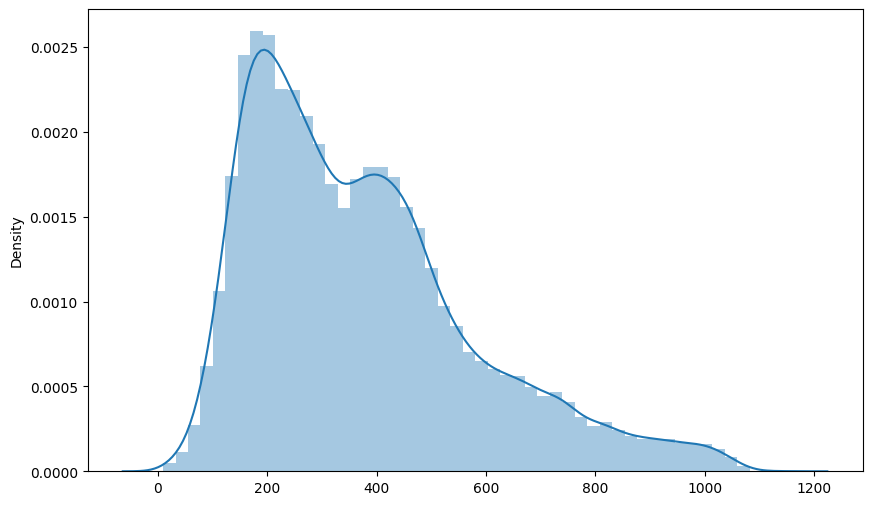

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(length)
plt.show()

In [24]:
tfidf = TfidfVectorizer(norm='l2',stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combine_text'])

In [26]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1312793 stored elements and shape (42618, 78015)>

In [27]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# numerical columns
num_df=df[['popularity','vote_average','vote_count']]

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_df=pd.DataFrame(scaler.fit_transform(num_df),columns=num_df.columns)
# range 0-1

In [30]:
num_df

,popularity,vote_average,vote_count
0,0.040087,0.77,0.384725
1,0.031079,0.69,0.171439
2,0.021394,0.65,0.006536
3,0.007049,0.61,0.002416
4,0.015320,0.57,0.012291
...,...,...,...
42613,0.001208,0.35,0.000071
42614,0.010382,0.57,0.001847
42615,0.000326,0.90,0.000213
42616,0.001649,0.38,0.000426


In [31]:
# making final dataframe for recommandation purpose
final_df=pd.concat([num_df.reset_index(drop=True)
                    ,genre_df.reset_index(drop=True),df['adult'].reset_index(drop=True)],axis=1)

In [32]:
final_df

,popularity,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,adult
0,0.040087,0.77,0.384725,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.031079,0.69,0.171439,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.021394,0.65,0.006536,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.007049,0.61,0.002416,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.015320,0.57,0.012291,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42613,0.001208,0.35,0.000071,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42614,0.010382,0.57,0.001847,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
42615,0.000326,0.90,0.000213,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42616,0.001649,0.38,0.000426,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [33]:
tfidf_matrix.shape

(42618, 78015)

In [34]:
final_df.shape

(42618, 24)

In [38]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
final_df_sparse = csr_matrix(final_df.values)

# Stack both sparse matrices horizontally
final_combined_sparse = hstack([tfidf_matrix, final_df_sparse])

print(final_combined_sparse.shape)


(42618, 78039)


In [39]:
from scipy import sparse
sparse.save_npz("final_combined_sparse.npz", final_combined_sparse)
# Load the saved sparse matrix later
loaded_sparse_matrix = sparse.load_npz("final_combined_sparse.npz")